<a href="https://colab.research.google.com/github/EricCallaway/COSC_6319_Project/blob/NavyaMakkena_COSC_6319_Project/biLSTM_text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.6 MB 5.2 MB/s 
     |████████████████████████████████| 880 kB 3.4 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
     |████████████████████████████████| 596 kB 65.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=1d0c510769c71fff33a2c0a207e324ffc9ffa032efe2b5c5a03f3e8f7f5f4896
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install datasets

     |████████████████████████████████| 325 kB 5.0 MB/s 
     |████████████████████████████████| 1.1 MB 66.2 MB/s 
     |████████████████████████████████| 212 kB 61.0 MB/s 
     |████████████████████████████████| 136 kB 59.4 MB/s 
     |████████████████████████████████| 127 kB 57.6 MB/s 
     |████████████████████████████████| 144 kB 57.6 MB/s 
     |████████████████████████████████| 271 kB 65.7 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from datasets import load_dataset

dataset = load_dataset("csebuetnlp/xlsum",'english')
train_report, train_summary = dataset['train']['text'][:10000], dataset['train']['summary'][:10000]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xlsum downloaded and prepared to /root/.cache/huggingface/datasets/csebuetnlp___xlsum/english/2.0.0/518ab0af76048660bcc2240ca6e8692a977c80e384ffb18fdddebaca6daebdce. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
!pip install contractions

     |████████████████████████████████| 106 kB 5.4 MB/s 
     |████████████████████████████████| 287 kB 37.0 MB/s 


In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import contractions
import numpy as np
from nltk.stem import WordNetLemmatizer

def text_lowercase(text):
    return text.lower()

def remove_numbers(text):
    output_text = re.sub(r'\d+', '', text)
    return output_text

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def remove_whitespace(text):
    return  text.strip()

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = " ".join([word for word in str(text).split() if word not in stop_words])
    return filtered_text

def remove_html(dataText):
    return BeautifulSoup(dataText, "lxml").text

def contraction_mapping(text):
    expanded_words = []   
    for word in text.split():
    # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))  
    expanded_text = ' '.join(expanded_words)
    return expanded_text

def lemmatization(text):
   lemmatizer = WordNetLemmatizer()
   return " ".join([lemmatizer.lemmatize(word) for word in text.split()])



def cleaning_data(content):
    # Lowercase text
    content = text_lowercase(content)

    # Remove numbers
    content = remove_numbers(content)

    # remove punctuation
    content = remove_punctuation(content)

    # remove whitespace from text
    content = remove_whitespace(content)

    # remove html from string
    content = remove_html(content)

    # contraction mapping
    content = contraction_mapping(content)

    # remove stopwords
    content = remove_stopwords(content)

    # lemmatization
    content = lemmatization(content)
    return content


cleaned_text = []
for t in range(len(train_report)):
    cleaned_text.append(cleaning_data(train_report[t]))

print(cleaned_text[:5])

cleaned_summary = []
for t in range(len(train_summary)):
    cleaned_summary.append(cleaning_data(train_summary[t]))

print(cleaned_summary[:10])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['met office issued yellow weather warning wind covering wale england starting gmt wednesday evening travel power likely disrupted warning remain place thursday gust mph kmh likely could hit mph coast hill heavy blustery shower', 'atlantis resource unveiled marine energy device invergordon ahead shipped kirkwall trial device run european marine energy centre test site eday device stand ft tall weighs tonne two set blade single unit could generate enough power home', 'police called scene outside coral shop compton road harehills bst man taken hospital treatment condition known west yorkshire police said area cordoned officer remain scene force appealed information', 'a

In [ ]:
max_text_len=1000
max_summary_len=50

In [ ]:
import pandas as pd

cleaned_text =np.array(cleaned_text)
cleaned_summary=np.array(cleaned_summary)

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True) 

In [ ]:
print(len(short_text))
print(len(short_summary))

9438
9438


In [ ]:
from keras.preprocessing.text import Tokenizer
VOCAB_SIZE = 50000
article_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
# articles
article_tokenizer.fit_on_texts(list(x_tr))
article_sequences = article_tokenizer.texts_to_sequences(x_tr)
article_val_seq   =   article_tokenizer.texts_to_sequences(x_val)
art_word_index = article_tokenizer.word_index
print(len(art_word_index))
# summaries
summary_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
summary_tokenizer.fit_on_texts(list(y_tr))
summary_sequences = summary_tokenizer.texts_to_sequences(y_tr)
summary_val_seq   = summary_tokenizer.texts_to_sequences(y_val) 
summary_word_index = summary_tokenizer.word_index
print(len(summary_word_index))

from keras.preprocessing.sequence import pad_sequences
import numpy as np

x_tr = pad_sequences(article_sequences, maxlen=max_text_len, padding='post', truncating='post')
y_tr = pad_sequences(summary_sequences, maxlen=max_summary_len, padding='post', truncating='post')
x_val = pad_sequences(article_val_seq, maxlen=max_text_len, padding='post', truncating='post')
y_val = pad_sequences(summary_val_seq, maxlen=max_summary_len, padding='post', truncating='post')

print(x_tr.shape)
print(y_tr.shape)

83637
19235
(8494, 1000)
(8494, 50)


In [ ]:
import numpy as np

embeddings_index = {}
with open('/content/drive/My Drive/Colab Notebooks/glove.6B.200d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 200
hits = 0
misses = 0

# Prepare embedding matrix for articles
article_embedding_matrix = np.zeros(((len(art_word_index)+1), embedding_dim))
for word, i in art_word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        article_embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
print(article_embedding_matrix.shape)

# Prepare embedding matrix for summaries
hits=0
misses = 0
summary_embedding_matrix = np.zeros((len(summary_word_index) + 1, embedding_dim))
for word, j in summary_word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        summary_embedding_matrix[j] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
print(summary_embedding_matrix.shape)

Found 400001 word vectors.
Converted 58016 words (25621 misses)
(83638, 200)
Converted 17216 words (2019 misses)
(19236, 200)


In [ ]:
from keras.layers import Embedding
import keras.initializers

encoder_embedding_layer = Embedding(
    input_dim = article_embedding_matrix.shape[0], #num_distinct_words
    output_dim = embedding_dim, #embedding_output_dims
    input_length = max_text_len, #max_sequence_length
    embeddings_initializer= keras.initializers.Constant(article_embedding_matrix),
    trainable = True
)

decoder_embedding_layer = Embedding(
    input_dim = summary_embedding_matrix.shape[0],
    output_dim = embedding_dim,
    input_length = max_summary_len,
    embeddings_initializer= keras.initializers.Constant(summary_embedding_matrix),
    trainable = True
)

In [ ]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout,Input,Activation,Bidirectional,TimeDistributed

# Input layer
encoder_input = layers.Input(shape=(max_text_len))
encoder_embedded = encoder_embedding_layer(encoder_input)

# Decoder -- LSTM
decoder_input = layers.Input(shape=(None,))
decoder_embedded = decoder_embedding_layer(decoder_input)

# Encoder 1 -- Bidirectional LSTM 1
encoder1_output, forward_h1, forward_c1 ,backward_h1, backward_c1= Bidirectional(layers.LSTM(200, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4,name="encoder1"),merge_mode="concat")(
    encoder_embedded
)
# Encoder 2 -- Bidirectional LSTM 2
encode2_output, forward_h2, forward_c2 ,backward_h2, backward_c2= Bidirectional(layers.LSTM(200, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4,name="encoder2"),merge_mode="concat")(
    encoder1_output,initial_state=[forward_h1,backward_h1,forward_c1,backward_c1]
)
state_h2 =  layers.Concatenate()([forward_h2, backward_h2])
state_c2 =  layers.Concatenate()([forward_c2, backward_c2])
encoder2_state = [state_h2,state_c2]

# Pass the encoder 2 state to decoder LSTM layer, as initial state
decoder_LSTM= layers.LSTM(400,return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2,name="decoder")
decoder_output,decoder_state_h1 ,decoder_state_c1 = decoder_LSTM(
    decoder_embedded, initial_state=encoder2_state
)
# Dense layer with activation
decoder_dense = TimeDistributed(layers.Dense(len(summary_word_index)+1,activation='softmax'))
decoder_output = decoder_dense(decoder_output)

model = keras.Model([encoder_input, decoder_input], decoder_output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1000, 200)    16727600    ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  [(None, 1000, 400),  641600      ['embedding[0][0]']              
                                 (None, 200),                                                     
                                 (None, 200),                                                     
                                 (None, 200),                                                 

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)


In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=50, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))


Epoch 1/50
170/170 [==============================] - 2688s 16s/step - loss: 3.3309 - val_loss: 2.7956
Epoch 2/50
170/170 [==============================] - 2552s 15s/step - loss: 2.9357 - val_loss: 2.6818
Epoch 3/50
170/170 [==============================] - 2277s 13s/step - loss: 2.8184 - val_loss: 2.6163
Epoch 4/50
170/170 [==============================] - 2397s 14s/step - loss: 2.7299 - val_loss: 2.5773
Epoch 5/50
170/170 [==============================] - 2511s 15s/step - loss: 2.6559 - val_loss: 2.5495
Epoch 6/50
170/170 [==============================] - 2397s 14s/step - loss: 2.5907 - val_loss: 2.5290
Epoch 7/50
170/170 [==============================] - 2488s 15s/step - loss: 2.5307 - val_loss: 2.5182
Epoch 8/50
170/170 [==============================] - 2441s 14s/step - loss: 2.4763 - val_loss: 2.5065
Epoch 9/50
170/170 [==============================] - 2410s 14s/step - loss: 2.4237 - val_loss: 2.5043
Epoch 10/50
170/170 [==============================] - 2489s 15s/step - l

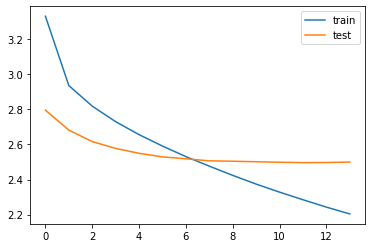

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index= summary_tokenizer.index_word
reverse_source_word_index= article_tokenizer.index_word
target_word_index=summary_tokenizer.word_index

# Encode the input sequence to get the feature vector
encoder_model = keras.Model(inputs=encoder_input,outputs=[encoder1_output, state_h2, state_c2])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_input =  Input(shape=( None,))
decoder_state_input_h = Input(shape=(400,))
decoder_state_input_c = Input(shape=(400,))
decoder_hidden_state_input = Input(shape=(max_text_len,400))
decode_input_states = [decoder_state_input_h, decoder_state_input_c]
# Get the embeddings of the decoder sequence
decoder_embedded1 = decoder_embedding_layer(decoder_input)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h3, state_c3 = decoder_LSTM(decoder_embedded1, initial_state=decode_input_states)

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = keras.Model(
    [decoder_input] + [decoder_hidden_state_input, decoder_state_input_h,decoder_state_input_c],
    [decoder_outputs2] + [state_h3, state_c3])


def conversion_to_wordsummary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def conversion_to_articletext(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

def decode_sequence(input_seq):
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = target_word_index['sostok']
    decoded_sentence = ''
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    stop_condition = False
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out,e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

for i in range(0,10):
    print("Review:",conversion_to_articletext(x_tr[i]))
    print("Original summary:",conversion_to_wordsummary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: azhar ahmed fir avenue ravensthorpe face racially aggravated public order charge arrested friday charged weekend police said soldier five battalion yorkshire regiment one duke lancaster killed bomb afghanistan tuesday cpl jake hartley pte anthony frampton pte christopher kershaw killed blast pte daniel wade pte daniel wilford sgt nigel coupe also died warrior armoured vehicle hit tuesday mr ahmed bailed 
Original summary: west yorkshire teenager appear court friday allegedly making comment facebook death six soldier afghanistan 
Predicted summary:  man appeared court charged connection death yearold man died hit car


Review: zoe kleinmantechnology reporter bbc news today turn virtual reality demo ce tech show went badly wrong started well elegant hotel suite top famous strip gaming chipmaker nvidia gave slick presentation shield product androidbased tv connected device offer host high quality entertainment option including vr time try new vr title mind blowing overall quietly 

In [ ]:
test_report, test_summary = dataset['test']['text'][:10], dataset['test']['summary'][:10]

In [ ]:
cleaned_test_text = []
for t in range(len(test_report)):
    cleaned_test_text.append(cleaning_data(test_report[t]))

print(cleaned_test_text[:5])

cleaned_test_summary = []
for t in range(len(test_summary)):
    cleaned_test_summary.append(cleaning_data(test_summary[t]))


import pandas as pd

cleaned_test_text =np.array(cleaned_test_text)
cleaned_test_summary=np.array(cleaned_test_summary)

short_test_text=[]
short_test_summary=[]

for i in range(len(cleaned_test_text)):
    if(len(cleaned_test_summary[i].split())<=max_summary_len and len(cleaned_test_text[i].split())<=max_text_len):
        short_test_text.append(cleaned_test_text[i])
        short_test_summary.append(cleaned_test_summary[i])
        
dataframe=pd.DataFrame({'text':short_test_text,'summary':short_test_summary})

dataframe['summary'] = dataframe['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

from keras.preprocessing.text import Tokenizer
VOCAB_SIZE = 50000
test_article_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
# articles
test_article_tokenizer.fit_on_texts(list(dataframe['text']))
test_article_sequences = test_article_tokenizer.texts_to_sequences(dataframe['text'])

# summaries
test_summary_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
test_summary_tokenizer.fit_on_texts(list(dataframe['summary']))
test_summary_sequences = test_summary_tokenizer.texts_to_sequences(dataframe['summary'])


from keras.preprocessing.sequence import pad_sequences
import numpy as np

test_article = pad_sequences(test_article_sequences, maxlen=max_text_len, padding='post', truncating='post')
test_summary = pad_sequences(test_summary_sequences, maxlen=max_summary_len, padding='post', truncating='post')


print(test_article.shape)
print(test_summary.shape)

for i in range(0,10):
    print("Review:",conversion_to_articletext(test_article[i]))
    print("Original summary:",conversion_to_wordsummary(test_summary[i]))
    print("Predicted summary:",decode_sequence(test_article[i].reshape(1,max_text_len)))
    print("\n")

['kate daileybbc news earlier week trump posted photo sitting desk maralargo permanent marker hovering notepad writing inaugural address winter white house maralago three week ago looking forward friday tweeted trump vow end american carnage trump angry call arm full text trump inauguration speech unclear whether presidentelect actually wrote speech content pure trump populist message resonated throughout primary campaign today merely transferring power one administration another one party another transferring power washington dc giving back people said beginning remark twitter bore eerie similarity batman villain bane speech dark night rise much someone posted second mashup two snarky reaction warned fox news commentator guy benson underestimate popular rhetoric trump supporter people panning speech still seem understand resonant never ignore theme still wrote referencing trump many callouts feel left american progress trump spoke country whose citizen long ignored coastal elite victo

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/bilstm_model')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/bilstm_model/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/bilstm_model/assets
